<a href="https://colab.research.google.com/github/kvinne-anc/Statistics-and-Probability/blob/master/Hypotheses_Testing_CreditApprovalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
credit = pd.read_csv(url, header=None)
credit.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [ ]:
credit.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
credit = credit.replace("?",np.NaN)
credit

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [ ]:
print(credit.isnull().values.sum())

0


In [ ]:
#Since we do not know what the columns represent the headers will be left as numbers 


In [ ]:
credit.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [ ]:
credit.columns


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [ ]:
credit.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
credit = credit.replace({'+': 1, '-': 0})
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [ ]:
credit.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,0
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,0


In [ ]:
credit['A2'] = pd.to_numeric(credit['A2'], downcast="float")

In [ ]:
pos = credit[credit['A16'] == 1] 
pos.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [ ]:
neg = credit[credit['A16'] == 0]
neg.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.330002,7.5,u,g,e,bb,1.585,t,f,0,t,s,00420,0,0
71,b,34.830002,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,0
72,a,38.580002,5.0,u,g,cc,v,13.500,t,f,0,t,g,00980,0,0
73,b,44.250000,0.5,u,g,m,v,10.750,t,f,0,f,s,00400,0,0
74,b,44.830002,7.0,y,p,c,v,1.625,f,f,0,f,g,00160,2,0


In [ ]:
pos1 = pos.dropna()
pos1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,a,21.500000,6.000,u,g,aa,v,2.50,t,t,3,f,g,00080,918,1
599,b,20.500000,2.415,u,g,c,v,2.00,t,t,11,t,g,00200,3000,1
600,a,29.500000,0.460,u,g,k,v,0.54,t,t,4,f,g,00380,500,1
606,b,16.170000,0.040,u,g,c,v,0.04,f,f,0,f,g,00000,0,1


In [ ]:
neg1 = neg.dropna()
neg1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.330002,7.500,u,g,e,bb,1.585,t,f,0,t,s,00420,0,0
72,a,38.580002,5.000,u,g,cc,v,13.500,t,f,0,t,g,00980,0,0
73,b,44.250000,0.500,u,g,m,v,10.750,t,f,0,f,s,00400,0,0
74,b,44.830002,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,0
75,b,20.670000,5.290,u,g,q,v,0.375,t,t,1,f,g,00160,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.080000,10.085,y,p,e,h,1.250,f,f,0,f,g,00260,0,0
686,a,22.670000,0.750,u,g,c,v,2.000,f,t,2,t,g,00200,394,0
687,a,25.250000,13.500,y,p,ff,ff,2.000,f,t,1,t,g,00200,1,0
688,b,17.920000,0.205,u,g,aa,v,0.040,f,f,0,f,g,00280,750,0


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
pos1['A2'].mean()

33.84546661376953

In [ ]:
neg['A2'].mean()

29.80823516845703

In [ ]:
ttest_ind(pos['A2'], neg['A2'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
ttest_ind(pos['A2'], neg['A2'], nan_policy='omit')

Ttest_indResult(statistic=4.292216401918219, pvalue=2.0276567251355697e-05)

In [ ]:
pos['A8'].mean()

3.427899022801302

In [ ]:
neg['A8'].mean()

1.2579242819843346

In [ ]:
ttest_ind(pos['A8'], neg['A8'], nan_policy='omit')

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

In [ ]:
pos['A15'].mean()

2038.85993485342

In [ ]:
neg['A15'].mean()

198.60574412532637

In [ ]:
ttest_ind(pos['A15'], neg['A15'], nan_policy='omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [ ]:
#So far it appears that there is a statistically significant difference between pos and neg elements, with A2 
#being the least drastic - and I assumed that category might be age but I could be wrong. 

In [ ]:
#Switching to crosstabs and chi squared exploration 


In [ ]:
pos.describe(exclude='number')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A14
count,304,303,303,303,303,307,307,307,307,301
unique,2,3,3,14,9,2,2,2,3,109
top,b,u,g,c,v,t,t,f,g,00000
freq,206,256,256,62,169,284,209,161,287,81


In [ ]:
neg.describe(exclude='number')

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A14
count,374,381,381,378,378,383,383,383,383,376
unique,2,2,2,14,9,2,2,2,3,107
top,b,u,g,c,v,f,f,f,g,00000
freq,262,263,263,75,230,306,297,213,338,51


In [ ]:
new = pd.crosstab(credit['A4'], credit['A16'])
new

A16,0,1
A4,,
l,0,2
u,263,256
y,118,45


In [ ]:
new2 = pd.crosstab(credit['A5'], credit['A16'], margins=True)
new2

A16,0,1,All
A5,,,
g,263,256,519
gg,0,2,2
p,118,45,163
All,381,303,684


In [ ]:
check2 = new2.iloc[0].values
check2

array([263, 256, 519])

In [ ]:
new3 = pd.crosstab(credit['A9'], credit['A16'], margins=True)
new3

A16,0,1,All
A9,,,
f,306,23,329
t,77,284,361
All,383,307,690


In [ ]:
check3 = new3.iloc[0].values
check3

array([306,  23, 329])

In [ ]:
new4 = pd.crosstab(credit['A10'], credit['A16'], margins=True)
new4

A16,0,1,All
A10,,,
f,297,98,395
t,86,209,295
All,383,307,690


In [ ]:
check4 = new4.iloc[0].values
check4

array([297,  98, 395])

In [ ]:
new5 = pd.crosstab(credit['A12'], credit['A16'])
new5

A16,0,1
A12,,
f,213,161
t,170,146


In [ ]:
check5 = new5.iloc[0].values
check5

array([213, 161, 374])

In [ ]:
new6 = pd.crosstab(credit['A13'], credit['A16'], margins=True)
new6

A16,0,1,All
A13,,,
g,338,287,625
p,3,5,8
s,42,15,57
All,383,307,690


In [ ]:
total = new6.loc['All', 'All']
total

690

In [ ]:
check6 = new6.iloc[0].values
check6

array([338, 287, 625])

In [ ]:
row_sums = new6.iloc[0, 0:3].values
col_sums = new6.iloc[0, 0:2].values

print(row_sums)
print(col_sums)

[338 287 625]
[338 287]


In [ ]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(3, 2)
[[165.57101449 140.5884058 ]
 [140.5884058  119.37536232]
 [306.15942029 259.96376812]]


In [ ]:
observed = pd.crosstab(credit['A13'], credit['A16']).values
print(observed.shape)
observed

(3, 2)


array([[338, 287],
       [  3,   5],
       [ 42,  15]])

In [ ]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 1035.034600251489


In [ ]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}") 

Degrees of Freedom: 2


In [ ]:
import scipy as sp
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 9.191570451545385
P-value: 0.010094291370456357
Degrees of Freedom: 2
Expected: 
 [[346.92028986 278.07971014]
 [  4.44057971   3.55942029]
 [ 31.63913043  25.36086957]]


In [ ]:
row_sum5 = new5.iloc[0, 0:2].values
col_sum5 = new5.iloc[0, 0:2].values

print(row_sum5)
print(col_sum5)

[213 161]
[213 161]


In [ ]:
expected1 = []
for i in range(len(row_sum5)):
    expected1_row = []
    for column in col_sum5:
        expected1_val = column*row_sum5[i]/total
        expected1_row.append(expected1_val)
    expected1.append(expected1_row)
    
expected1 = np.array(expected1)
print(expected1.shape)  
print(expected1)

(2, 2)
[[65.75217391 49.7       ]
 [49.7        37.56666667]]


In [ ]:
observed1 = pd.crosstab(credit['A12'], credit['A16']).values
print(observed1.shape)
observed1

(2, 2)


array([[213, 161],
       [170, 146]])

In [ ]:
chi_squared1 = ((observed1 - expected1)**2/(expected1)).sum() 
print(f"Chi-Squared1: {chi_squared1}")

Chi-Squared1: 1183.1749936471833


In [ ]:
chi_squared1, p_value, dof, expected1 = stats.chi2_contingency(observed1)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 9.191570451545385
P-value: 0.45094587758631943
Degrees of Freedom: 1
Expected: 
 [[346.92028986 278.07971014]
 [  4.44057971   3.55942029]
 [ 31.63913043  25.36086957]]


In [ ]:
#Due to a p-value of less than .05 we reject the null hypothesis that A13 and A16 are independent
#We conclude that there is an association between A13 values and credit approval or denial
#The opposite can be said of A12 and A16 


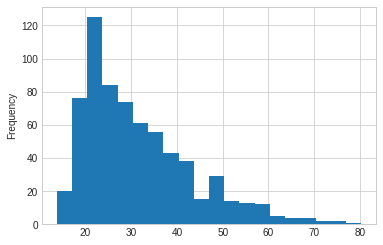

In [ ]:
credit['A2'].plot(kind='hist', bins=20);

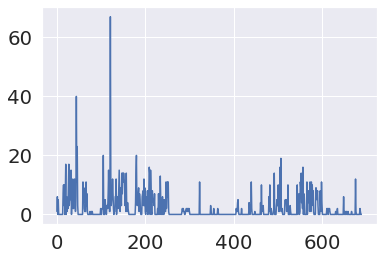

In [ ]:
credit['A11'].plot()

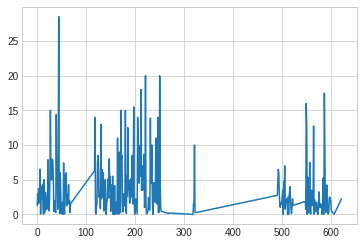

In [ ]:
pos1['A8'].plot()

In [ ]:
credit['A8'].value_counts()

0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
3.960     1
2.040     1
1.040     1
4.165     1
5.375     1
Name: A8, Length: 132, dtype: int64

In [ ]:
testA8 = pd.crosstab(credit['A8'], credit['A16'], margins=True)
testA8

A16,0,1,All
A8,,,
0.0,52,18,70
0.04,20,13,33
0.085,21,5,26
0.125,25,5,30
0.165,20,2,22
...,...,...,...
17.5,0,1,1
18.0,0,1,1
20.0,0,2,2


In [ ]:
A81 = testA8.iloc[1][0:6].values
A81

array([20, 13, 33])

In [ ]:
credit['A16'].value_counts()

0    383
1    307
Name: A16, dtype: int64

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [ ]:
#All of my ttests resulted in a rejection of the null hypothesis and demonstrated statistical significance when testing 
#between pos and neg subsets of the credit data - each column tested resulted as such
#For the CHi2 tests, due to a p-value of less than .05 we reject the null hypothesis that A13 and A16 are independent
#We conclude that there is an association between A13 values and credit approval or denial

#The most challenging part now is trying to figure out how these graphs come in - or if I even did them right? I can't graph the categorical variables 
#and I get an error saying these cannot be graphed to a single shape when I try to make the elaborate plot graph


*Your words here!*

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



In [ ]:
#Bayesian stats takes into account the external factors that weigh in on, or affect, probability - such as the probability of a caldera volcano
#erupting tomorrow. Freq might say that at any given time the chances for eruption are x at any given time, and Bayes would say we can look at the history
#of the vlocano and how often it has or has not erupted and calculate a higher chance of eruption based on how overdue for one we are
#this prior probability is the main distinction.  

*Your words here!*

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [ ]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.